In [3]:
import os
if not os.path.exists('srgan.pth.tar'):
    !pip install -q torch_snippets
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')
    from torch_snippets import *
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
model = torch.load('srgan.pth.tar', map_location='cpu')['generator'].to(device)
model.eval()

/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/dist-packages/torch/serialization.py:671: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [5]:
!wget http://rugd.vision/data/RUGD_sample-data.zip

--2022-04-16 13:27:26--  http://rugd.vision/data/RUGD_sample-data.zip
Resolving rugd.vision (rugd.vision)... 52.216.144.10
Connecting to rugd.vision (rugd.vision)|52.216.144.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19910018 (19M) [application/zip]
Saving to: ‘RUGD_sample-data.zip’

RUGD_sample-data.zi 100%[===================>]  18.99M  45.8MB/s    in 0.4s    

2022-04-16 13:27:27 (45.8 MB/s) - ‘RUGD_sample-data.zip’ saved [19910018/19910018]



In [6]:
!unzip RUGD_sample-data.zip

Archive:  RUGD_sample-data.zip
   creating: RUGD_sample-data/
   creating: RUGD_sample-data/images/
  inflating: RUGD_sample-data/images/park-2_00501.png  
  inflating: RUGD_sample-data/images/trail-12_00501.png  
  inflating: RUGD_sample-data/images/trail-9_00001.png  
  inflating: RUGD_sample-data/images/creek_02001.png  
  inflating: RUGD_sample-data/images/trail-14_01001.png  
  inflating: RUGD_sample-data/images/park-1_02001.png  
  inflating: RUGD_sample-data/images/park-2_02001.png  
  inflating: RUGD_sample-data/images/trail-11_02001.png  
  inflating: RUGD_sample-data/images/trail-3_02001.png  
  inflating: RUGD_sample-data/images/trail-4_02001.png  
  inflating: RUGD_sample-data/images/trail-6_02001.png  
  inflating: RUGD_sample-data/images/trail_02001.png  
  inflating: RUGD_sample-data/images/creek_00001.png  
  inflating: RUGD_sample-data/images/park-1_00001.png  
  inflating: RUGD_sample-data/images/park-8_00001.png  
  inflating: RUGD_sample-data/images/trail-10_00001.p

In [7]:
rugd_dir="/content/RUGD_sample-data/images"
test_images=[]
for i in os.listdir(rugd_dir):
    test_images.append(rugd_dir+"/"+i)

In [ ]:
rugd_dir

In [8]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

In [11]:
image = readPIL(test_images[0])
image.size
# (260,181)
image = image.resize((300,430))
im = preprocess(image)

In [12]:
sr = model(im[None])[0]
sr = postprocess(sr)

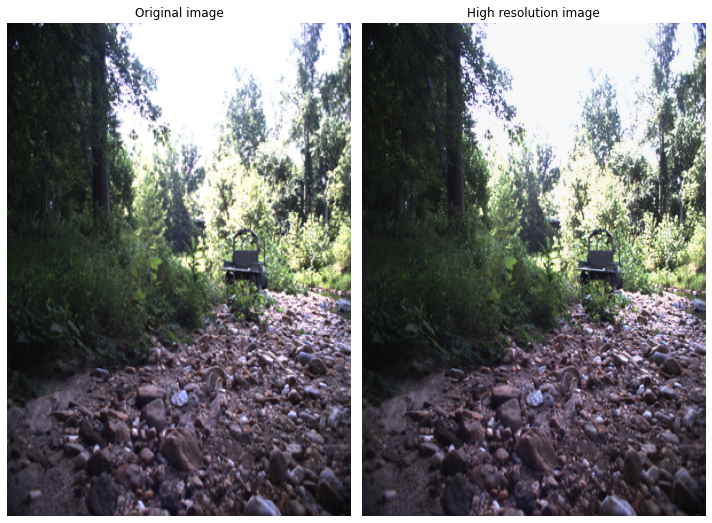

In [13]:
subplots([image, sr], nc=2, figsize=(10,10), titles=['Original image','High resolution image'])